# For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [5]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [7]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [8]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [9]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [10]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [11]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Durga
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Durga
[nltk_data]     Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Tokens count
len(text_tokens)

17847

In [13]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [14]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [15]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [16]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [17]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'st

In [18]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

In [19]:
###--Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [20]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2346, 'trace': 3011, 'cyberpunk': 767, 'hdr': 1357, 'nextlevel': 1959, 'have': 1352, 'try': 3042, 'great': 1304, 'interview': 1555, 'doge': 890, 'underestimate': 3175, 'congratulation': 675, 'tesla': 2916, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1639, 'year': 3391, 'now': 1987, 'next': 1958, 'even': 1031, 'happy': 1339, 'new': 1956, 'ox': 2088, 'frodo': 1207, 'underdoge': 3174, 'all': 197, 'thought': 2953, 'would': 3377, 'fail': 1091, 'himself': 1401, 'haha': 1327, 'thank': 2927, 'indeed': 1496, 'tweet': 3057, 'definitely': 804, 'represent': 2413, 'realworld': 2361, 'time': 2969, 'allocation': 199, 'the': 2932, 'entertaining': 1001, 'outcome': 2067, 'likely': 1694, 'just': 1597, 'send': 2556, 'agree': 179, 'clubhouse': 613, 'it': 1574, 'get': 1266, 'real': 2356, 'buy': 502, 'dogecoin': 892, 'lil': 1695, 'toddler': 2981, 'hodler': 1407, 'he': 1358, 'issue': 1573, 'sentencing': 2561, 'seem': 2548, 'bit': 418, 'high': 1392, 'fix': 1152, 'please': 218

In [21]:
print(cv.get_feature_names_out()[100:200])


['74' '78' '7th' '90' '9007' '922' '948' '95' '99' 'aber' 'able' 'abo'
 'aboard' 'abort' 'about' 'above' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel'
 'accelera' 'accelerate' 'acceleration' 'accelerator' 'accept'
 'acceptable' 'access' 'accessible' 'accident' 'accidental' 'accommodate'
 'account' 'accura' 'accuracy' 'accurate' 'ace' 'achieve' 'achievement'
 'achy' 'acquisition' 'across' 'action' 'active' 'activity' 'actual'
 'actuall' 'actually' 'actuary' 'adagio' 'add' 'additive' 'address'
 'administer' 'adult' 'advanc' 'advance' 'advanced' 'advantage'
 'adventure' 'advertise' 'advice' 'advise' 'aero' 'afb' 'affair' 'affect'
 'affordable' 'africa' 'after' 'afternoon' 'age' 'ago' 'agony' 'agree'
 'ah' 'ahead' 'ahem' 'ai' 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka'
 'alert' 'alexander' 'algo' 'algorithm' 'alien' 'aliens' 'align' 'all'
 'allocati' 'allocation']


In [22]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(tweetscv.toarray().shape)

(11486, 3411)


In [24]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [25]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())


['actually' 'ai' 'also' 'back' 'big' 'booster' 'car' 'come' 'cool' 'could'
 'crew' 'day' 'design' 'do' 'dragon' 'earth' 'engine' 'even' 'ever'
 'exactly' 'falcon' 'first' 'flight' 'fsd' 'future' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'if' 'it' 'just' 'land' 'launch' 'life'
 'like' 'look' 'lot' 'love' 'make' 'many' 'mar' 'maybe' 'mission' 'model'
 'much' 'need' 'new' 'next' 'no' 'not' 'one' 'part' 'people' 'point'
 'pretty' 'probably' 'production' 'right' 'rocket' 'rt' 'say' 'seem'
 'soon' 'space' 'spacex' 'starlink' 'starship' 'start' 'still' 'super'
 'sure' 'take' 'tesla' 'test' 'thank' 'that' 'the' 'there' 'they' 'think'
 'this' 'time' 'true' 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will'
 'work' 'would' 'yeah' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


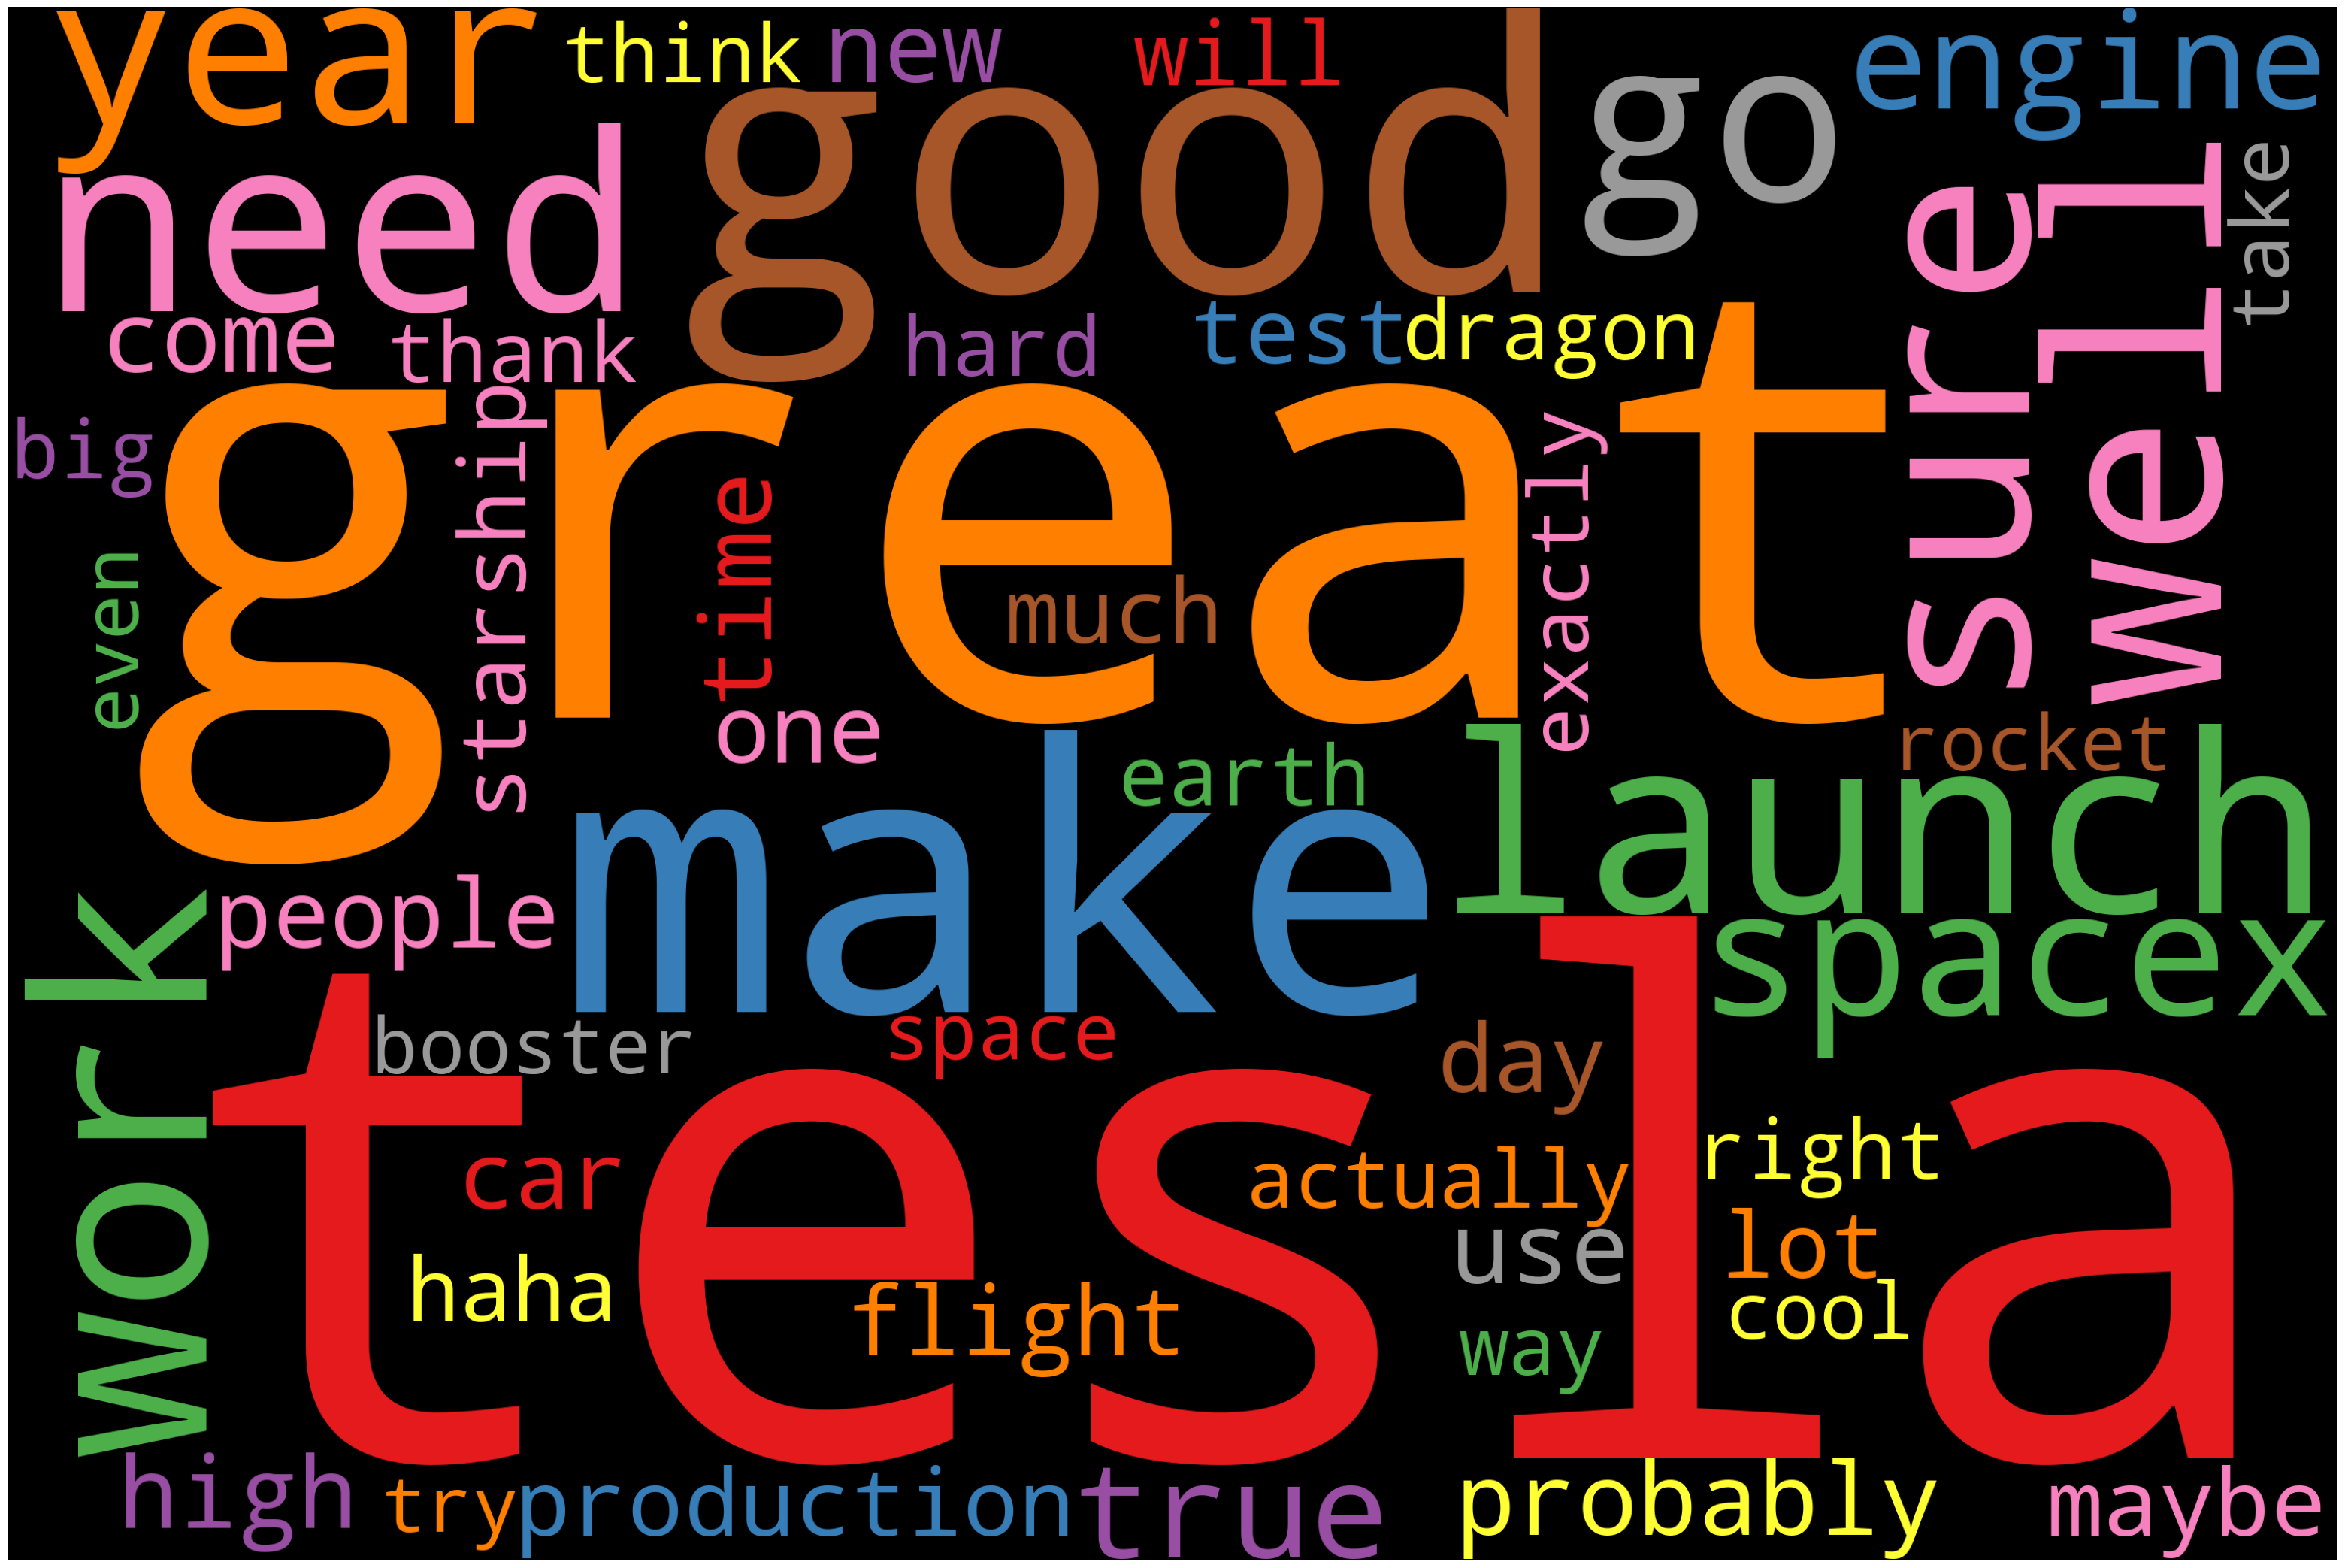

In [26]:
###--Word-Cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [27]:
###--- Sentiment Analysis
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [28]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [29]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [30]:
print(sent_df.columns)

Index(['sentence', 'word_count'], dtype='object')


C:\Users\Durga Prasad\AppData\Local\Temp\ipykernel_28424\4048757981.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['word_count'])


<Axes: xlabel='word_count', ylabel='Density'>

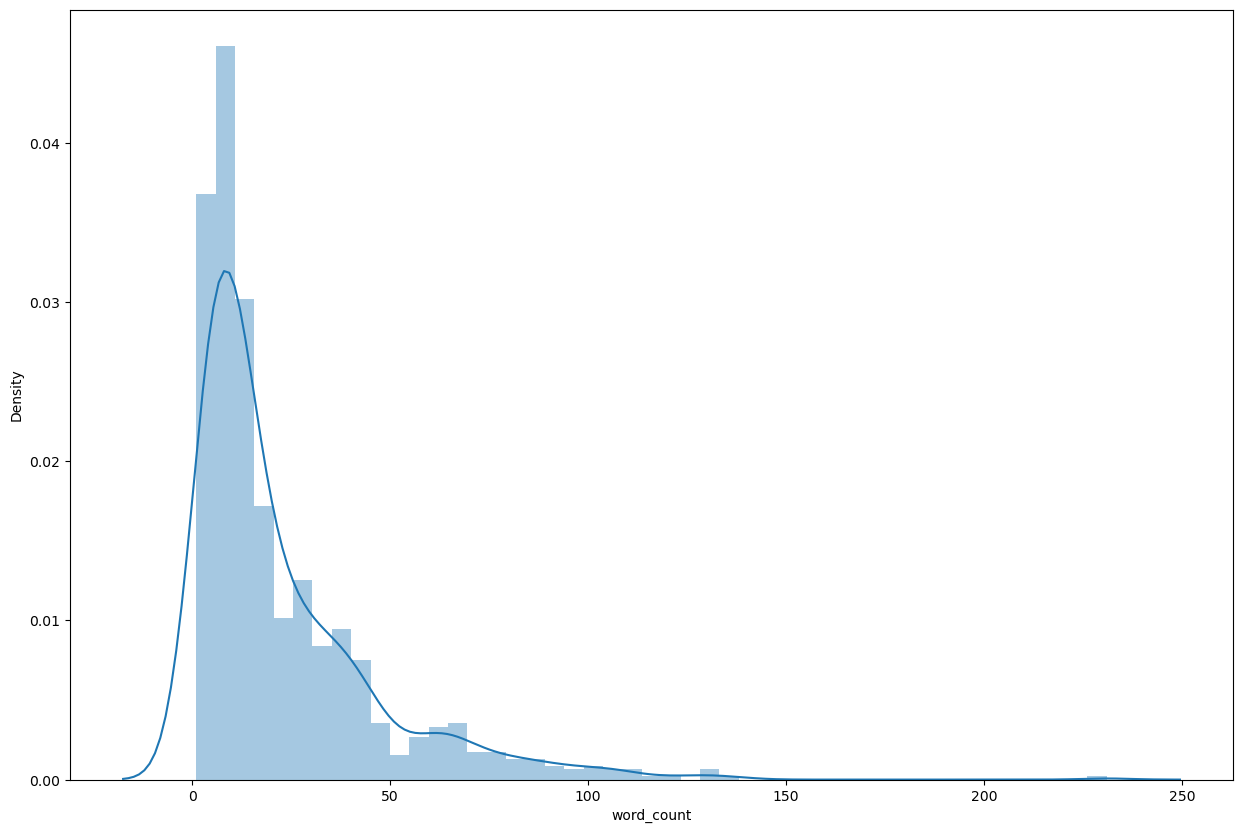

In [31]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['word_count'])
